In [1]:
%matplotlib widget
#from NPScattering2D_numba_doublesum import NanoparticleScattering2D
from NPScattering2D import NanoparticleScattering2D
from ase.cluster import Decahedron,Icosahedron,Octahedron
from ase.io import write
import numpy as np
from debyecalculator import DebyeCalculator
from ase.visualize import view
import os
from matplotlib import pyplot as plt

1. Create structure file using ase

In [2]:
atoms = Decahedron('Au',5,25,0)
print(f'The structure contains {len(atoms)} atoms')
file = f'./test.xyz'
atoms.write(file)
#os.system (f'jmol {file}')

# la particule est étirée suivant z. 


The structure contains 1329 atoms


2. create NanoparticleScattering2D instance

In [3]:
np_scatter = NanoparticleScattering2D(file, Distance= 0.5, wl= 1.54, npix= 2000, pixel_size= 0.00015)


----------------------------------------------------
 Configuration du détecteur / gamme Q accessible
----------------------------------------------------
 Longueur d'onde λ = 1.5400 Å
 Distance échantillon-détecteur = 500.00 mm
 Taille pixel = 0.150 mm
 Nombre de pixels = 2000 x 2000

 Gamme Qx : -1.1724 → 1.1713 Å⁻¹
 Gamme Qy : -0.3241 → 0.0000 Å⁻¹
 Gamme Qz : -1.1724 → 1.1713 Å⁻¹
 Module |Q| : 0.0000 → 1.6261 Å⁻¹
----------------------------------------------------



3. Rotate particle to align it along x (90° aorund Y)

In [4]:
np_scatter.rotate_positions(alpha=0,beta=90,gamma = 0)
#np_scatter.view_structure()
# La particule est alignées suivant x

array([[-4.03899393e+01,  0.00000000e+00, -2.47317050e-15],
       [-3.75049437e+01,  0.00000000e+00, -2.29651546e-15],
       [-3.46199480e+01,  0.00000000e+00, -2.11986043e-15],
       ...,
       [ 2.88499567e+01,  2.94905510e-01, -8.59715516e+00],
       [ 3.17349523e+01,  2.94905510e-01, -8.59715516e+00],
       [ 3.46199480e+01,  2.94905510e-01, -8.59715516e+00]])

3. Compute 2D intensity and plot

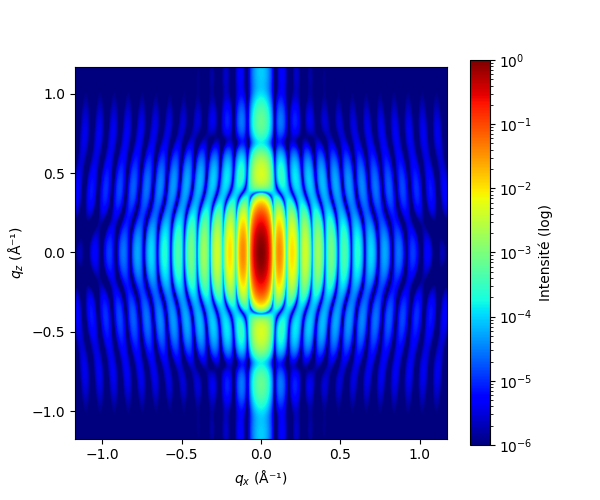

In [5]:
I_map=np_scatter.compute_intensity()
np_scatter.plot_intensity(I_map,vmin=-6)

4. integrate to obtain I(q)

In [6]:

q,i=np_scatter.integrate_with_pyfai(I_map)

  File "/home-local/ratel-ra/Documents/Python_code/Debye_3D/NPScattering2D.py", line 305, in ai
    ai = AzimuthalIntegrator(dist=self.D, detector=detector)


### Moyenne orientationnelle utilisant la quadrature de Fibonacci

In [7]:
q_iso,i_iso = np_scatter.compute_isotropic_intensity_fibonacci()

5. make debye calculation using DebyeCalculator

In [8]:
q_dc, i_dc = np_scatter.compute_Iq_debyecalc()

/home-local/ratel-ra/Documents/Python_code/Debye_3D/NPScattering2D.py:173: UserWarning: Warning: Your system might have a CUDA-enabled GPU, but CUDA is not available. Computations will run on the CPU instead. For optimal performance, please install Pytorch with CUDA support. If you do not have a CUDA-enabled GPU, you can surpress this warning by specifying the 'device' argument as 'cpu'
  calc= DebyeCalculator(qmin=self.q_min,qmax=self.q_max,qstep=qstep,biso=0, device='cuda')


6. plot to compare

Text(0, 0.5, 'I(q)')

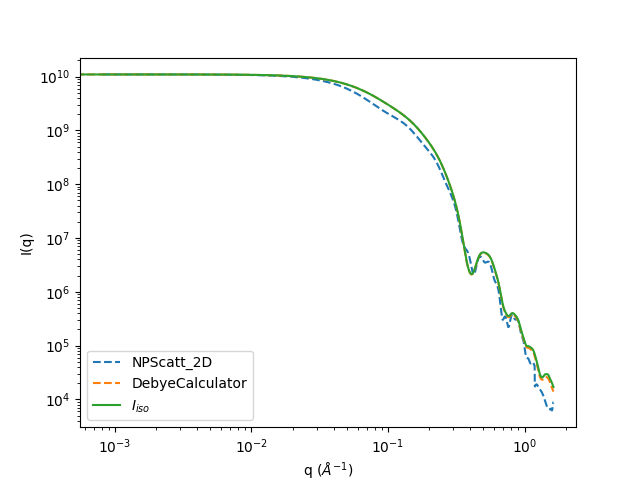

In [9]:
f0 = np_scatter.xray_f0(np_scatter.elements[0],q_dc)
N=np_scatter.nb_atoms

K=1

plt.figure()
plt.loglog(q,i,'--',label=f'NPScatt_2D')
plt.loglog(q_dc,i_dc*K,'--',label=f'DebyeCalculator')
plt.loglog(q_iso,i_iso,label = '$I_{iso}$') 
plt.legend()
plt.xlabel('q ($\AA^{-1}$)')
plt.ylabel('I(q)')

## Distribution d'orientation

In [10]:
I_dist = np_scatter.compute_intensity_gaussian_3D(sigma_y=2,sigma_z=2,n_y=5,n_z=5)

Orientation averaging: 100%|██████████| 25/25 [05:26<00:00, 13.04s/it]


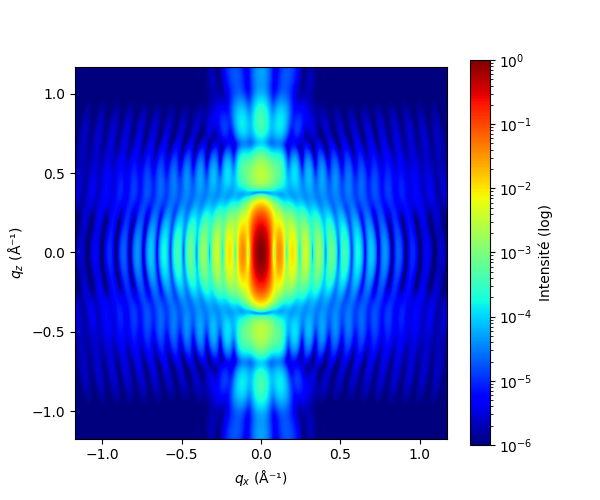

In [11]:
np_scatter.plot_intensity(I_dist)